In [1]:
# Let's start with importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Please check the Logistic Regression videos for data set information 

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# replacing zero values with the mean of the column

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [4]:
print(data.shape)

(768, 9)


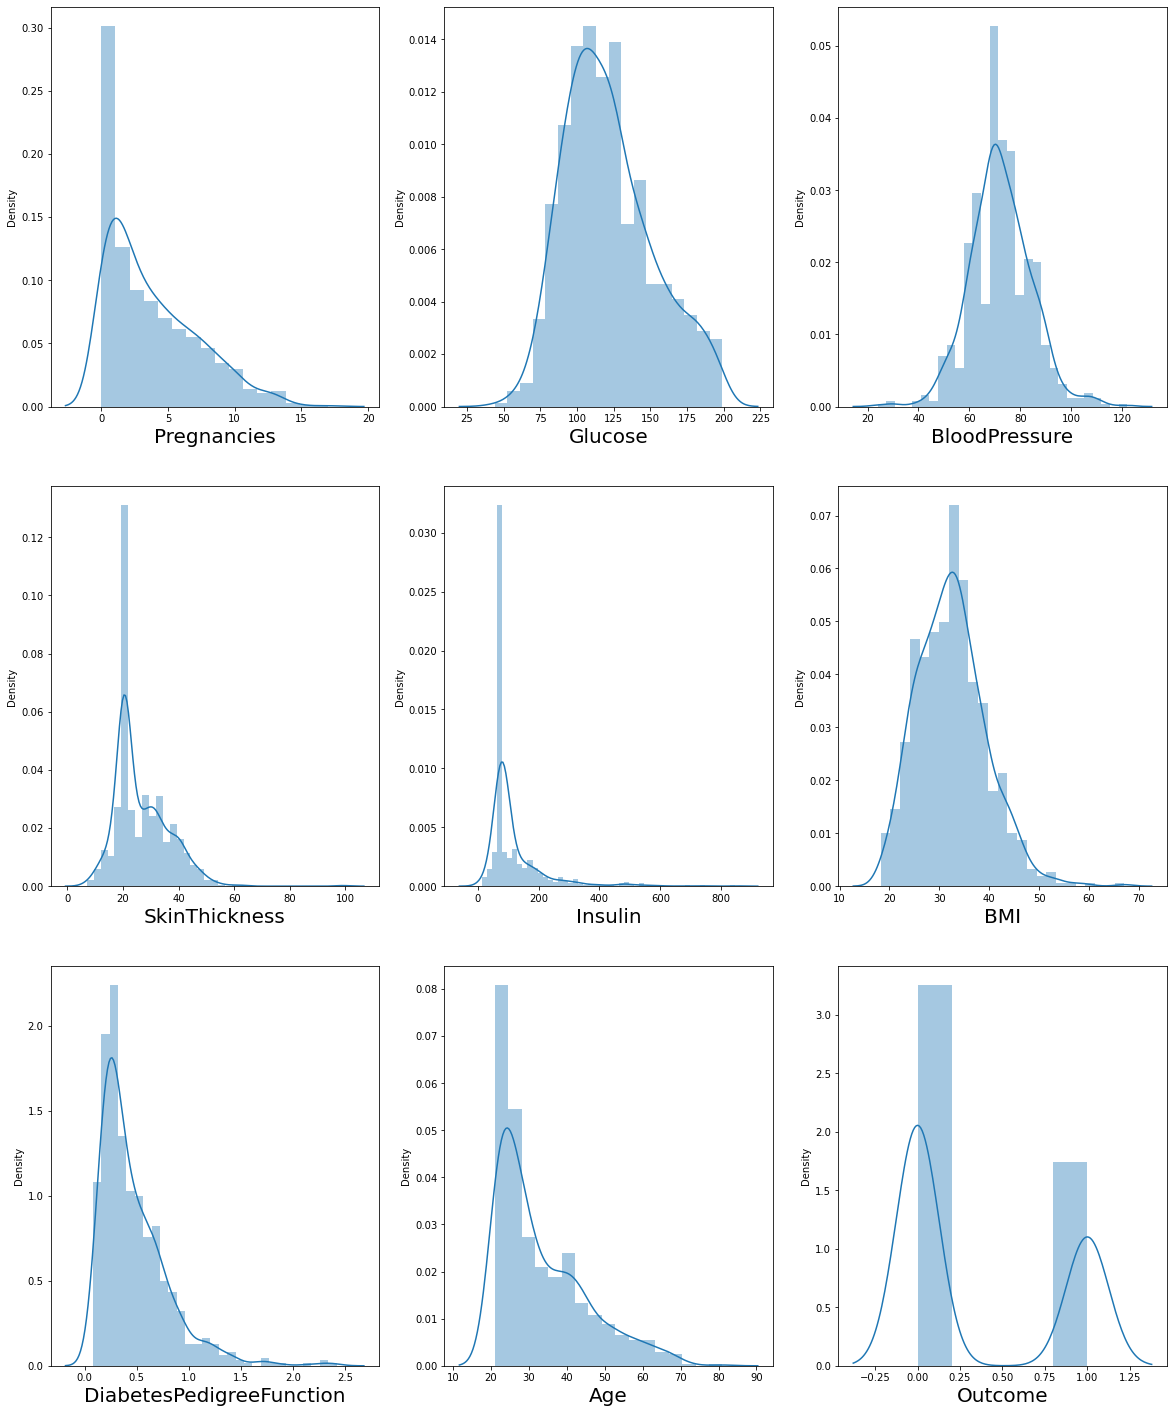

In [5]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:   # as  there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    
    plotnumber+=1
plt.show()

# Apply log transformation on continues variable

it is primarily used to convert a skewed distribution to normal distribution/less-skewed distribution.In this transform, we take the log of the values in a column and use these values as the column instead

In [6]:
data['Insulin'] = np.log(data['Insulin'])
data['BloodPressure'] = np.log(data['BloodPressure'])
data['SkinThickness'] = np.log(data['SkinThickness'])
data['BMI'] = np.log(data['BMI'])
data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])
data['Age'] = np.log(data['Age'])

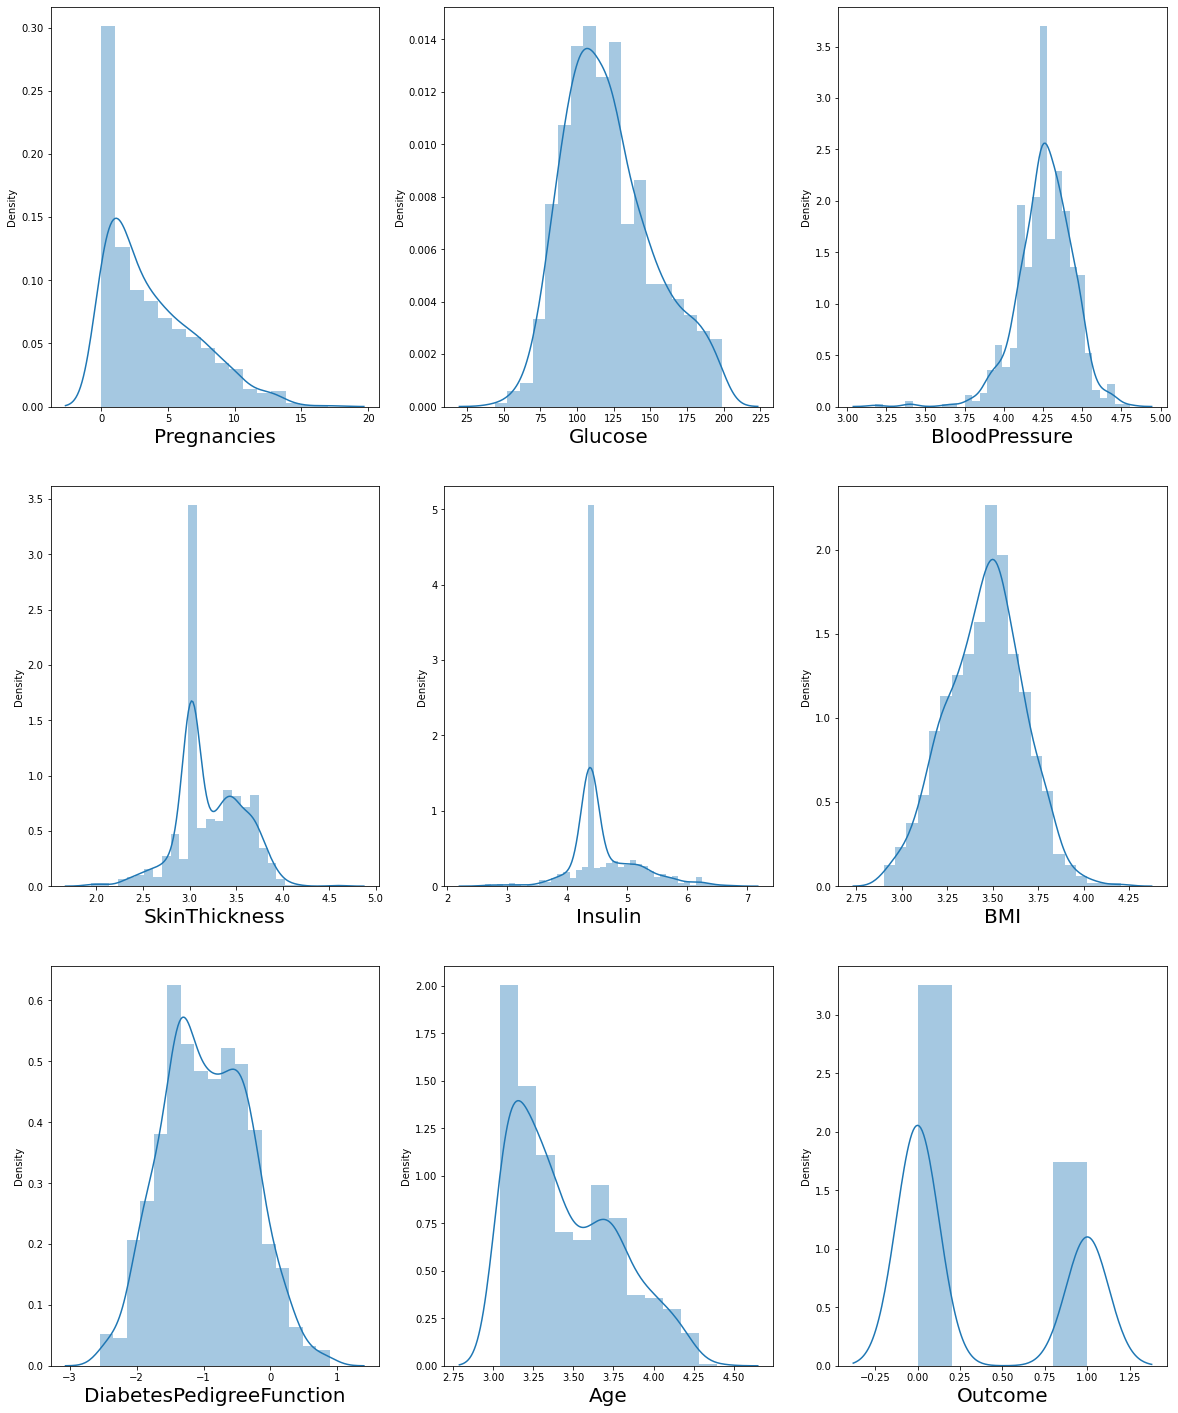

In [7]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:   # as  there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    
    plotnumber+=1
plt.show()

# Power Transformer
It is a data transformation technique used to stablize variance , make the data more normal distribution like

In [8]:
# Read files
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv") # Reading the Data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
#Replacing zero values with the mean of the column

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())



data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [24]:
features=['Insulin','BMI','BloodPressure','SkinThickness','Age']

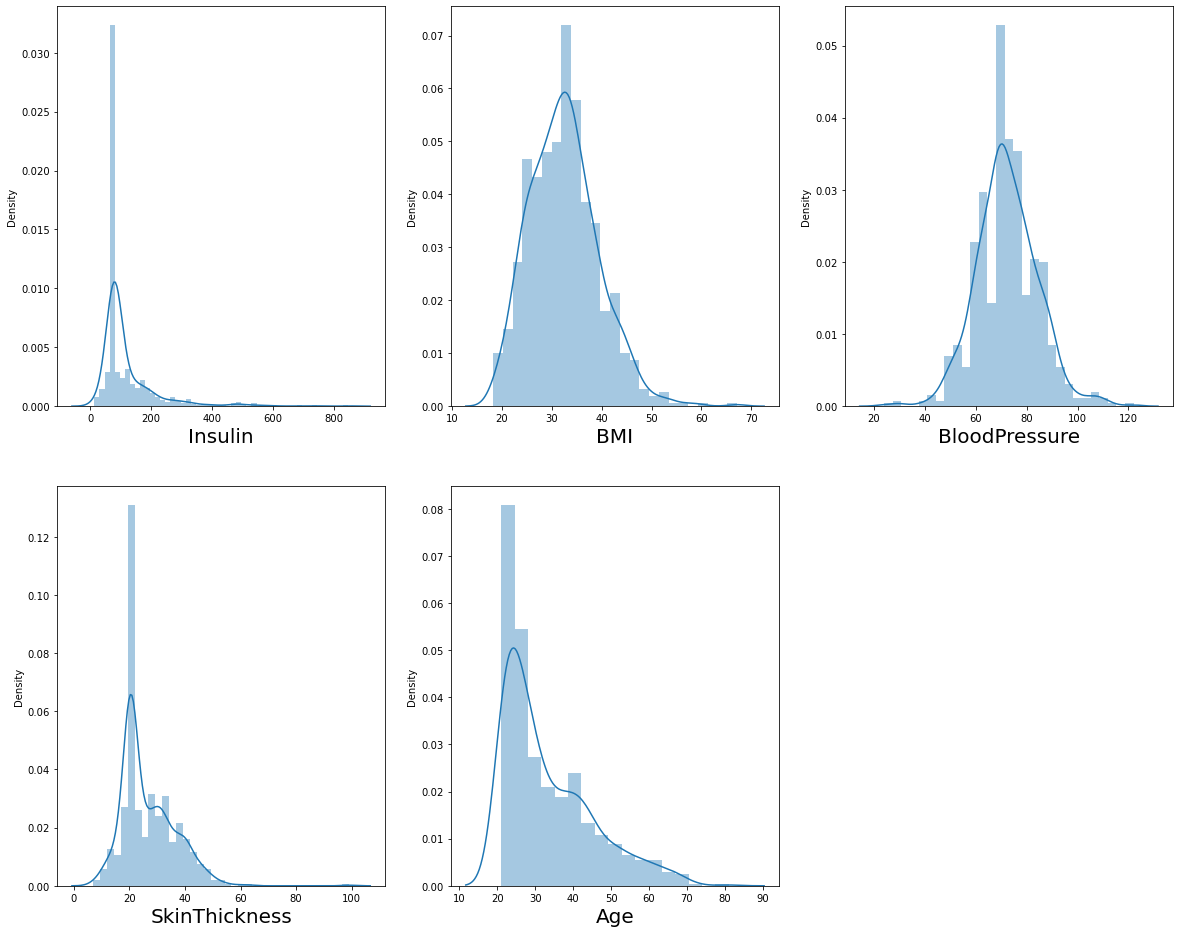

In [25]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data[features]:
    if plotnumber<=9:   # as  there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    
    plotnumber+=1
plt.show()

# -Box-Cox works with only positive value(>0)
# - Yeo-Johnson works with both positive and negative values.

In [26]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

    

In [27]:
data[features]= scaler.fit_transform(data[features].values)

In [28]:
data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.350666,0.261508,-0.009147,0.956846,1.362797
1,-0.350666,-0.841776,-0.507220,0.415886,0.127990
2,-0.350666,-1.457249,-0.674630,-0.567991,0.231506
3,-0.025195,-0.584749,-0.507220,-0.246245,-1.483064
4,1.006677,1.462877,-2.750268,0.956846,0.328461
...,...,...,...,...,...
763,1.117625,0.161140,0.319657,1.873163,1.764261
764,-0.350666,0.697359,-0.174501,0.211217,-0.366775
765,0.305525,-0.912547,-0.009147,-0.246245,0.017237
766,-0.350666,-0.260838,-1.011681,-0.567991,1.236934


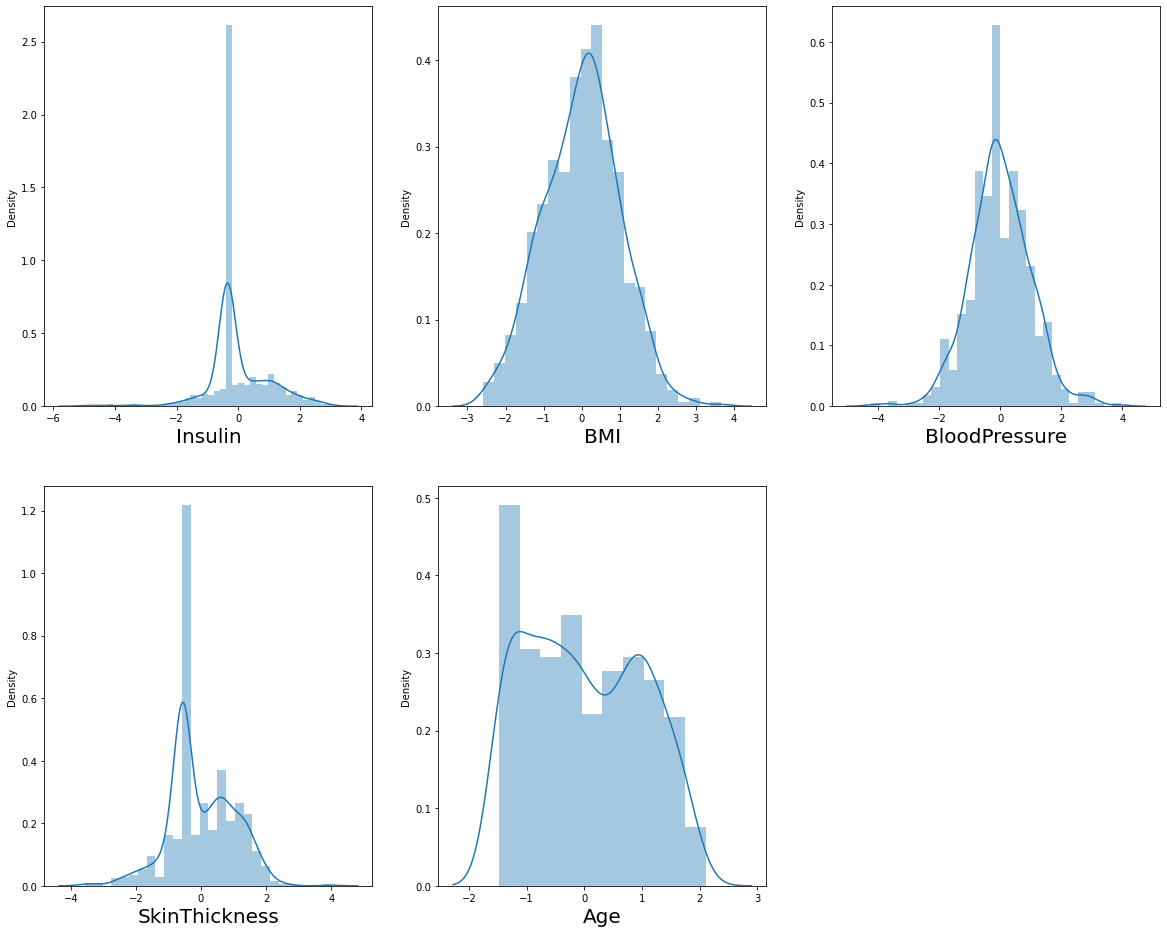

In [29]:
#Let's see how data is distributed for every column after powe transformer
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data[features]:
    if plotnumber<=9:   # as  there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    
    plotnumber+=1
plt.show()

In [ ]:
# post all transformations you can continue with train test split (you dont need to apply standard scaler on top of it)